### 4.6 Lab: Logistic Regression, LDA, QDA, and KNN

#### An Application to Caravan Insurance Data
This data set includes 85 predictors that measure demographic characteristics for 5,822 individuals.

###### Features 

###### Response 
* Purchase- which indicates whether or not a given individual purchases a caravan insurance policy


In [1]:
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os.path
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)
pd.set_option('display.width', 120)
pd.set_option('precision', 4)

In [2]:
load_app_config()
DIRECTORY="islr"
FILENAME ='caravan.csv'
RESPONSE="Purchase"
input_path = get_datafolder_path()

{'UAT': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'REG': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'DEV': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'PRD': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}}
Adding F:\MachineLearning  to system path
Adding F:\DataSource  to system path


In [3]:
def load_dataset(filename=FILENAME,response=RESPONSE):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = load_data(input_file)
    print(" input file is :{0} loaded.".format(input_file))
    #print(input_dataset.head())
    
    try:
        continuous_vars = input_dataset.describe().columns
        print("Continous Variables")
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns
        print("Categorical Variables")
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
        categorical_vars = None
    
    response_column =  [col for col in input_dataset.columns if response in col]
    feature_columns =  [col for col in input_dataset.columns if response not in col]
            
    
    return  input_dataset,feature_columns,response_column

In [4]:
input_dataset,feature_columns,response_column = load_dataset(filename=FILENAME,response=RESPONSE)
input_dataset = input_dataset.drop('SNO',axis=1)
feature_columns.remove('SNO')
X = input_dataset[feature_columns]
y = input_dataset[response_column]

 input file is :F:\DataSource\islr\caravan.csv loaded.
Continous Variables
Index(['SNO', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE',
       'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC',
       'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT',
       'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG',
       'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT',
       'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG',
       'AWAOR

In [5]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*40,"feature columns"))
    print(feature_columns)
    print("<{0} {1} {0}>".format("="*40,"data header"))
    #print(X.head().to_string())
    print("<{0} {1} {0}>".format("="*40,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -X"))
    print(X.describe())
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -y"))
    print(y.describe())
    print("<{0} {1} {0}>".format("="*40,"value_count -y"))
    print(y.groupby(response_column)[response_column].count())
    #print(input_dataset.groupby(response_column)['Year'].count())
    #print("<{0} {1} {0}>".format("="*40,"Correlation"))
    #print(input_dataset.corr(method='pearson'))

In [6]:
display_data_descriptives(input_dataset,X,feature_columns,y,response_column)

<======================================== feature columns ========================================>
['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIET

In [7]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
input_dataset[response_column] = class_le.fit_transform(input_dataset[response_column].values.ravel())
input_dataset[response_column].head(5)

,Purchase
0,0
1,0
2,0
3,0
4,0


In [8]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction

def select_features_by_XTree(X,y):
    model = ExtraTreesClassifier()
    model.fit(X, y.values.ravel())

    selected_features =np.array(model.feature_importances_)
    selected_features_X = pd.DataFrame(X.columns.values, columns=['name'])
    selected_features =selected_features.reshape(len(X.columns),1)

    selected_features_X['model_result'] =selected_features
    selected_features_X =selected_features_X.sort_values(by='model_result',ascending=False)
    return selected_features_X

In [9]:
print("<{0} {1} {0}>".format("="*40,"Feature Selection by XTree Classifier"))
features_XTree = select_features_by_XTree(X,y)
top_features =features_XTree['name']
top_features =list(top_features.values)
top_features =top_features[1:10]

<======================================== Feature Selection by XTree Classifier ========================================>


In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection  import  train_test_split
from sklearn.linear_model  import LogisticRegression

def evaluvate_pipeline(X_train,y_train,model,model_name):
    
    # create pipeline
    estimators =[]
    estimators.append(('standardize', StandardScaler()))
    estimators.append((model_name, model))
    pipeline = Pipeline(estimators)
    # evaluate pipeline
    kfold = KFold(n_splits=10, random_state=7)
    scores = cross_val_score(pipeline, X_train, y_train.values.ravel(), cv=kfold)
    
    return scores,pipeline

In [11]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)),"\n" )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),"\n")
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)),"\n")
    return y_pred

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

from matplotlib import style

style.use('seaborn-colorblind')

def plot_roc(y_test, y_pred):
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    fig = plt.figure(figsize=(6,4))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    roc_auc_score(y_test, y_pred)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.94006769585
Accuracy:0.941 

Classification report
             precision    recall  f1-score   support

          0       0.94      1.00      0.97       941
          1       0.00      0.00      0.00        59

avg / total       0.89      0.94      0.91      1000
 

Confusion matrix
[[941   0]
 [ 59   0]] 



F:\Anaconda2\envs\machinelearning\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


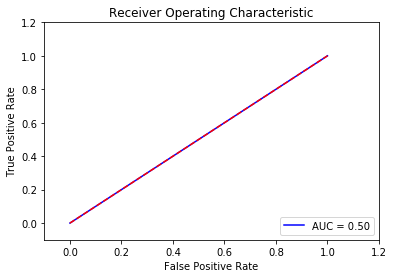

[[ 0.9382  0.0618]
 [ 0.9864  0.0136]
 [ 0.893   0.107 ]
 ..., 
 [ 0.9382  0.0618]
 [ 0.8889  0.1111]
 [ 0.9886  0.0114]]


In [13]:
X = input_dataset[top_features]
y = input_dataset[response_column]
X_train = X.iloc[1000:,:]
y_train = y.iloc[1000:]
X_test = X.iloc[:1000,:]
y_test = y.iloc[:1000]

test_size = 0.17
seed = 1
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)

model =LogisticRegression()
print(model)
scores,pipeline = evaluvate_pipeline(X_train,y_train,model,'log_reg')

print(scores.mean())

pipeline.fit(X_train,y_train.values.ravel())

y_pred = measure_performance(X_test,y_test,pipeline, show_accuracy=True, 
                             show_classification_report=True,
                             show_confusion_matrix=True, show_r2_score=False)

plot_roc(y_test, y_pred)

y_pred_proba =  pipeline.predict_proba(X_test)
 
print(y_pred_proba)


### Using KNN

0.932184737507
Accuracy:0.934 

Classification report
             precision    recall  f1-score   support

          0       0.94      0.99      0.97       941
          1       0.18      0.03      0.06        59

avg / total       0.90      0.93      0.91      1000
 

Confusion matrix
[[932   9]
 [ 57   2]] 



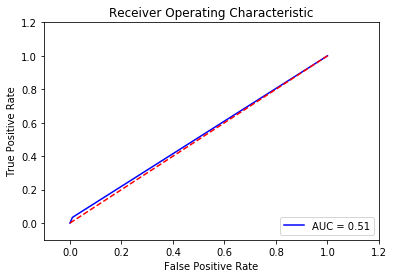

In [14]:
from sklearn.neighbors import KNeighborsClassifier

#X = input_dataset[top_features]
#y = input_dataset[response_column]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)

test_size = 0.17
seed = 1

model =KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores,pipeline = evaluvate_pipeline(X_train,y_train,model,'KNN')
print(scores.mean())
pipeline.fit(X_train,y_train.values.ravel())

y_pred = measure_performance(X_test,y_test,pipeline, show_accuracy=True, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)
plot_roc(y_test, y_pred)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.94006769585
Accuracy:0.941 

Classification report
             precision    recall  f1-score   support

          0       0.94      1.00      0.97       941
          1       0.00      0.00      0.00        59

avg / total       0.89      0.94      0.91      1000
 

Confusion matrix
[[941   0]
 [ 59   0]] 



F:\Anaconda2\envs\machinelearning\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


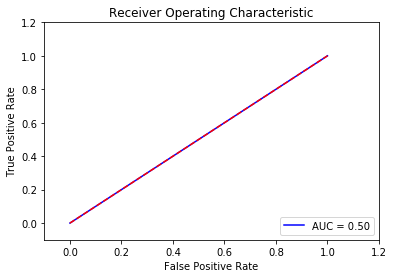

[[ 0.9382  0.0618]
 [ 0.9864  0.0136]
 [ 0.893   0.107 ]
 ..., 
 [ 0.9382  0.0618]
 [ 0.8889  0.1111]
 [ 0.9886  0.0114]]


In [41]:
X = input_dataset[top_features]
y = input_dataset[response_column]
X_train = X.iloc[1000:,:]
y_train = y.iloc[1000:]
X_test = X.iloc[:1000,:]
y_test = y.iloc[:1000]

test_size = 0.17
seed = 1
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)

model =LogisticRegression()
print(model)
scores,pipeline = evaluvate_pipeline(X_train,y_train,model,'log_reg')

print(scores.mean())

pipeline.fit(X_train,y_train.values.ravel())

y_pred = measure_performance(X_test,y_test,pipeline, show_accuracy=True, 
                             show_classification_report=True,
                             show_confusion_matrix=True, show_r2_score=False)

plot_roc(y_test, y_pred)

y_pred_proba =  pipeline.predict_proba(X_test)
 
print(y_pred_proba)


y_test_inv = y_test.values.ravel()
y_test_inv = class_le.inverse_transform(y_test_inv)
 
cm_df = pd.DataFrame({'True': y_test_inv, 'Pred': y_pred_proba[:,1] > .25})
cm_df.Pred.replace(to_replace={True:'Yes', False:'No'}, inplace=True)

In [42]:
print(cm_df.groupby(['True', 'Pred']).size().unstack('True').T)

Pred   No  Yes
True          
No    938    3
Yes    57    2


In [43]:
print(metrics.classification_report(y_test_inv, cm_df.Pred))

             precision    recall  f1-score   support

         No       0.94      1.00      0.97       941
        Yes       0.40      0.03      0.06        59

avg / total       0.91      0.94      0.92      1000

